## Bag of Words for Image Classification

Bag of words can not only be used to featurize text - we can also use it on images for classification problems. In this assignment you will be classifying a subset of images from the CIFAR-10 dataset using SIFT featurization on images, and K-means clustering in order to construct a vocabulary of image features with which we can implement the bag of words model.

![image](SIFT.jpg)

## Import/Install Dependencies

In [ ]:
!pip install keras
!pip install --upgrade tensorflow

In [180]:
from matplotlib import pyplot
import pysift
import numpy as np
from scipy.cluster.vq import *
from keras.datasets import cifar10
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

## Load and Clean Dataset
We will be using the CIFAR-10 dataset, which is a common benchmark dataset used for image classification models. It contains 60,000 images split into 10 different classes, with 6000 images per class. The dataset is further split into a training and test set, with 50000 of the images belonging to the training set, and 10000 belonging to the test set. For our purposes, we will be training a binary classifier to try and get the best results on the data, as SIFT (the featurizer) does not work as well on the 32x32 images that CIFAR-10 contains.

In [212]:
##Load data from the keras library - this should take around a minute to run
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [ ]:
## We are working with the first 3000 images from the training set for y = 1 and y = 2, 
## corresponding to cars and birds respectively
Xtrain = []
ytrain = []
count1 = 0
count2 = 0
num_data = 3000                  ###EDIT THIS TO REDUCE RUNTIME (at cost of accuracy)
for i in range(len(trainX)):
    if trainy[i] == 1 and count1 < num_data:
        Xtrain.append(trainX[i])
        ytrain.append(trainy[i])
        count1 += 1
    if trainy[i] == 2 and count2 < num_data:
        Xtrain.append(trainX[i])
        ytrain.append(trainy[i])
        count2 += 1
    if count1 == count2 == num_data:
        break
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

## Our test set consists of the first 150 images from the test set for the classes we are classifying on
Xtest = []
ytest = []
count1 = 0
count2 = 0
for i in range(len(testX)):
    if testy[i] == 1 and count1 < 150:
        Xtest.append(testX[i])
        ytest.append(testy[i])
        count1 += 1
    if trainy[i] == 2 and count2 < 150:
        Xtest.append(testX[i])
        ytest.append(testy[i])
        count2 += 1
    if count1 == count2 == 100:
        break
Xtest = np.array(Xtest)
ytest = np.array(ytest)


Train: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(300, 32, 32, 3), y=(300, 1)
[1]
[1]
[2]
[2]
[2]
[2]
[1]
[2]
[2]


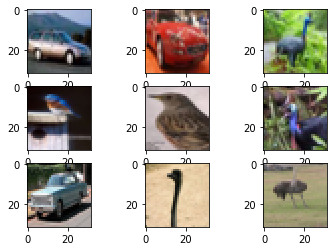

In [224]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(Xtrain[i])
    print(ytrain[i])
# show the figure
pyplot.show()

## Part A
Based on the images displayed above, what are some basic features that you think might be useful to distinguish between the two classes? 

###Your answer here

###Your answer here

## Part B: Generating Descriptors
We will be using an implementation of SIFT from outside of the opencv library in order to reduce setup (the SIFT_create function for cv2 requires building opencv-python from scratch). SIFT (Scale Invariant Feature Transform) is a method of detecting and describing local features in images, as shown in the image below, where SIFT is applied to images of faces for emotion classification. The pysift function we will be using is computeKeypointsAndDescriptors, which takes in an image (a matrix with dimensions (n, m, 1)), and returns a list of keypoints and descriptors for that image. What we care about are the descriptors, which are vectors that describe each of the keypoints. We will later apply a clustering algorithm on the set of all descriptors in order to generate an image vocabulary to apply bag of words to.
![image](SIFT2.jpg)

In this question you will fill in the missing code in the below `generate_descriptors` function in order to return a list of all descriptors of keypoints found in the images. The exact output is described in the comment for the function below. NOTE: A correct implementation may take several hours to run on the 3000 image training set, so running this in the background once completed is reccommended. - if you would like to run the code in a shorter amount of time consider changing num_data in the data generation code.

In [ ]:
def generate_descriptors(X):
    '''
    Generate list of all SIFT features found in images using pysify.computeKeypointsAndDescriptors
    and mapping from image index to descriptors for that image
    '''
    X_feat = []       ##X_feat should be a list of all descriptors found in the images
    image_map = {}    ##image map should be a dictionary mapping from image index to a list of all descriptors for that image
    meaned = np.mean(X[0], axis=2)
    keypoints, descriptors = pysift.computeKeypointsAndDescriptors(meaned)
    image_map[0] = descriptors
    
    ### PART B CODE GOES HERE
    
    ### PART B CODE GOES HERE        
    
    return X_feat, image_map

In [ ]:
Xtrain_feat, Xtrain_image_map = generate_descriptors(Xtrain)

100
200
300
400
500
600
700
800
900
1000
1100
1200


## Part C: Generating a Vocabulary
We need to create a vocabulary from the list of descriptors in order to create bag of words features for each image. One approach is to use k-means clustering on the list of descriptors, and for each cluster of descriptors to define a "word". You may find the scipy.cluster.vq kmeans function useful in the implementation of generate_vocab.

In [192]:
def generate_vocab(X_feat, k):
    '''
    Use kmeans on the descriptors with a given number of clusters to generate a vocabulary of SIFT features
    '''
    ### Part C Code Here
    
    ### Part C Code Here
    return vocab

## Part D: Bag of Words Featurization
Now that we have implemented vocabulary generation, we are ready to create the vocabulary and use bag of words to featurize each of our images. You may find the scipy.cluster.vq vq function useful in the implementation of bag of words featurization. We essentially want to create a vector containing counts of different vocabulary words (each cluster in our kmeans from the previous problem is a word) for every image.

In [ ]:
def bag_of_words_featurize(image_map, k, vocab):
    '''
    Use bag of words and the given vocabulary to featurize all images and return im_features
    '''
    im_features = np.zeros((len(image_map.keys()), k), "float32")    ###im_features should be a nxk matrix, where k 
                                                                     ###is the number of words and n is the number of images
    
    ### PART D CODE HERE
    
    ### PART D CODE HERE
    return im_features


Now we can call the functions `generate_vocab` and `bag_of_words_featurize` in order to generate our Xtrain_featurized matrix. We arbitrarily pick a value of our hyperparameter k at first (which sets the size of the vocabulary), but will tune it in the next part of this question.

In [ ]:
k = 300
vocab = generate_vocab(Xtrain_feat, k)
Xtrain_featurized = bag_of_words_featurize(Xtrain_image_map, k, vocab)

## Part E: Training the Model
Now that we have a featurized Xtrain matrix, we can use SVM or logistic regression to classify our datapoints. Try a few different models, and report which one seems to work the best in terms of test accuracy - keep in mind that you also have to generate descriptors and featurize the Xtest matrix.

In [ ]:
## PART E CODE HERE (featurizing the test data in a different cell since it takes a while)

## PART E CODE HERE

In [205]:
### PART E CODE HERE

### PART E CODE HERE

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### PART E Text Here
What model worked the best? Report your highest training and test accuracy on the given data.
### PART E Text Here

### Part F: Hyperparameter Tuning
Now that we have picked a model, we should also determine what vocabulary size will lead to the most optimal testing accuracy. Note that picking too high of a k value could lead to overfitting on the training data, and that a low k value could lead to loss of information. Write code below to try and determine the value of k that yields the best test accuracy, and write about why you think that value of k makes sense.

In [ ]:
### PART F CODE HERE

### PART F CODE HERE

### PART F Text Here
What value of k yielded the highest test accuracy? Report your highest test accuracy and the value of k corresponding to it. Explain why this value of k makes sense in the context of the question
### PART F Text Here